# Regressão Linear Múltipla
* Criar uma função de produção de educação dos cursos de economia no Brasil ou função de desempenho
* Variáveis que traduzem características do aluno como: esforço, família, história, estrutura, sexo e cor
*  É utilizada para controlar outros fatores que estejam relacionados à variável dependente: variável de interesse e variável de controle. 
* Busca da explicação da correlação entre as variáveis para explicar o desempenho dos alunos de economia do país.
* Individuar a variável de interesse e controlar o conjunto de variáveis de controle de mesmo grupo, mantendo todo o resto constante. Isso mantêm as mesmas características.
* Controlar outros fatores que estejam relacionados a variável de interesse. Caso contrário eles devem refletir no termo erro e resultar num padrão de comportamento que não esta nas variáveis independentes.
> Problema: muitas das variáveis independentes podem ser correlacionadas entre si e resultar em  multicolinearidade.

    > A multicolinearidade deixa o estimador ineficiente: ou seja, ele não é o estimador com a menor variância possível, a estatística T deve ficar menor, provavelmente regeitando a hipótese nula. Induzindo a multicolinearidade as estatísticas ficam menores, regeitando a hipótese nula por uma característica que não é do modelo e sim de das variáveis. 
    
    > Testes ('F') para saber qual variável se adequa mais ao modelo. Talvez criar um avariável que tome conta de todas
    
* Hoje em dia é possível construir fatores para driblar o problema da multicolinearidade. 
* Vetores Ortogonais: Umvetor de variável não esta correlacionado com o outro (análise fatorial)
* Construção de um índice utilizando todas as variáveis correlacionadas 
---
1. Matriz de correlação entre as variáveis




In [3]:
library(dplyr)
library(ggplot2)
library(gplots)
library(cowplot)
library(graphics)
library(lmtest)
library(ggpubr)

In [4]:
library(Amelia)

In [221]:
#install.packages('plyr')

package 'plyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Eduardo\AppData\Local\Temp\RtmpSgpgsh\downloaded_packages


In [6]:
library(plyr)

In [8]:
library(fastDummies)

In [10]:
library(corrgram)

In [11]:
data = read.table("dataset/enade.txt",sep=";", dec = ",", header = TRUE, stringsAsFactors = FALSE)
head(data)

NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,...,QE_I59,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,5
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,6
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,5
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,5,6,6,6,6,4
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,6
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,5,6,6,6,6,6,6,6,5


In [12]:
dim(data)

[1] 548127    137

# Alunos de Ciências Econômicas que fizeram o Enade


In [13]:
df = data[data$CO_GRUPO == 13 & data$TP_PRES == 555,]
head(df)
dim(df)


,NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,...,QE_I59,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68
161,2018,1780,10008,10022,13,81867,1,4309605,43,4,...,6,6,6,6,6,6,6,6,6,6
162,2018,1780,10008,10022,13,81867,1,4309605,43,4,...,6,6,6,6,6,6,6,6,6,6
163,2018,1780,10008,10022,13,81867,1,4309605,43,4,...,6,6,6,6,6,6,6,6,6,6
164,2018,1780,10008,10022,13,81867,1,4309605,43,4,...,6,6,6,6,6,6,6,6,6,6
165,2018,1780,10008,10022,13,81867,1,4309605,43,4,...,6,6,6,6,6,6,6,6,6,6
166,2018,1780,10008,10022,13,81867,1,4309605,43,4,...,6,6,6,6,6,6,6,6,6,6


[1] 8075  137

# Variáveis de interesse
### Ponderação: esforço, família, história, estrutura da universidade, sexo e raça
* Notas Gerais = 45 NT_GER
1. Sexo = 12 TP_SEXO
2. Raça ou Cor = 71 QE_I02
## Família
3. Estado Civil = 70 QE_I01
4. Escolaridade do pai = 73 QE_I04
5. Escolaridade da mãe = 74 QE_I05
6. Moradia = 75 QE_I06
7. Quantas pessoas moram com o estudante = 76 74 QE_I07
8. Renda total da família = 77 QE_I08
9. Situação Financeira = 78 QE_I09
10. Situação de Trabalho = 79 QE_I10
11. Contemplado com bolsa = 80 QE_I11
12. Se recebeu algum tipo de bolsa de permanência = 81 QE_I12
13. Se recebeu algum tipo de bolsa acadêmica = 82 QE_I13
14. Ingresso por meio de política de ação afirmativa ou inclusão social = 84 QE_I15
15. Tipo de escola cursou o ensino médio = 86 QE_I17
16. Modalidade de ensino = 87 QE_I18
17. Incentivo = 88 QE_I19
18. Grupo que ajudou a enfrentar dificuldades = 89 QE_I20
19. Alguêm da família que concluiu o ensino superir = 90 QE_I21
20. Quantidade de livros lido = 91 QE_I22
21. Horas dedicadas as estudo = 92 QE_I23
22. Motivo para ter escolhido a instituição de ensino = 94 QE_I25
23. O curso ofereceu oportunidades para superar dificuldades = 109 QE_I40
24. O curso exigiu organização e dedicação aos estudos = 111 QE_I42
## Estrutura da universidade
25. Metodologia de ensino = 98 QE_I29
26. Plano de ensino = 107 QE_I38
27. Coordenação = 110 QE_I41
28. Enventos = 114 QE_I45 
29. Domínio do conteúdo pelos professores = 126 QE_I57
30. Tecnologia da informação TIC's = 127 QE_I58
31. Quantidade de funcionários de apoio = 128 QE_I59
32. Infraestrutura das salas = 130 QE_I61
33. Equipamentos e materiais para aulas práticas em número suficiente = 131 QE_I62
34. Ambientes e equipamentos para aulas práticas adequados = 132 QE_I63
35. Biblioteca = 133 QE_I64
36. Refeitorio, cantina e banheiros em condições adequadas = 137 QE_I68



In [14]:
df = select(df, 45, 12, 71, 70, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 86, 87, 88, 89, 90, 91, 92, 94, 109, 111, 98, 107, 110, 114, 126, 127, 128, 130, 131, 132, 133, 137)

In [15]:
dim(df)

[1] 8075   37

In [35]:
str(df)

'data.frame':	8022 obs. of  37 variables:
 $ NT_GER : num  24.9 25.6 48.7 35.7 33.9 23.5 32.2 20.9 48.9 39.4 ...
 $ TP_SEXO: chr  "F" "M" "M" "F" ...
 $ QE_I02 : chr  "A" "A" "A" "A" ...
 $ QE_I01 : chr  "A" "A" "A" "B" ...
 $ QE_I04 : chr  "D" "D" "D" "B" ...
 $ QE_I05 : chr  "D" "B" "D" "C" ...
 $ QE_I06 : chr  "C" "A" "C" "C" ...
 $ QE_I07 : chr  "C" "C" "C" "D" ...
 $ QE_I08 : chr  "C" "D" "C" "B" ...
 $ QE_I09 : chr  "F" "E" "C" "E" ...
 $ QE_I10 : chr  "E" "E" "E" "E" ...
 $ QE_I11 : chr  "C" "B" "C" "E" ...
 $ QE_I12 : chr  "A" "A" "A" "A" ...
 $ QE_I13 : chr  "A" "A" "A" "A" ...
 $ QE_I15 : chr  "A" "A" "C" "A" ...
 $ QE_I17 : chr  "A" "D" "D" "A" ...
 $ QE_I18 : chr  "A" "B" "A" "A" ...
 $ QE_I19 : chr  "B" "B" "A" "B" ...
 $ QE_I20 : chr  "G" "H" "C" "C" ...
 $ QE_I21 : chr  "B" "A" "B" "A" ...
 $ QE_I22 : chr  "C" "C" "D" "B" ...
 $ QE_I23 : chr  "C" "B" "C" "B" ...
 $ QE_I25 : chr  "C" "C" "C" "C" ...
 $ QE_I40 : int  6 6 6 6 6 6 6 6 6 6 ...
 $ QE_I42 : int  6 6 6 6 6 6 6 6

# Valores ausentes

In [17]:
sapply(df, function(x) sum(is.na(x)))

NT_GER TP_SEXO  QE_I02  QE_I01  QE_I04  QE_I05  QE_I06  QE_I07  QE_I08  QE_I09 
      4       0       0       0       0       0       0       0       0       0 
 QE_I10  QE_I11  QE_I12  QE_I13  QE_I15  QE_I17  QE_I18  QE_I19  QE_I20  QE_I21 
      0       0       0       0       0       0       0       0       0       0 
 QE_I22  QE_I23  QE_I25  QE_I40  QE_I42  QE_I29  QE_I38  QE_I41  QE_I45  QE_I57 
      0       0       0     435     103     101     128     217     267      99 
 QE_I58  QE_I59  QE_I61  QE_I62  QE_I63  QE_I64  QE_I68 
    180     267     139    1024    1273     210     199

In [18]:
df = df[!is.na(df$NT_GER),]

In [19]:
sapply(df, function(x) sum(is.na(x)))
dim(df)

NT_GER TP_SEXO  QE_I02  QE_I01  QE_I04  QE_I05  QE_I06  QE_I07  QE_I08  QE_I09 
      0       0       0       0       0       0       0       0       0       0 
 QE_I10  QE_I11  QE_I12  QE_I13  QE_I15  QE_I17  QE_I18  QE_I19  QE_I20  QE_I21 
      0       0       0       0       0       0       0       0       0       0 
 QE_I22  QE_I23  QE_I25  QE_I40  QE_I42  QE_I29  QE_I38  QE_I41  QE_I45  QE_I57 
      0       0       0     434     103     101     128     217     267      99 
 QE_I58  QE_I59  QE_I61  QE_I62  QE_I63  QE_I64  QE_I68 
    180     267     139    1023    1272     210     199

[1] 8071   37

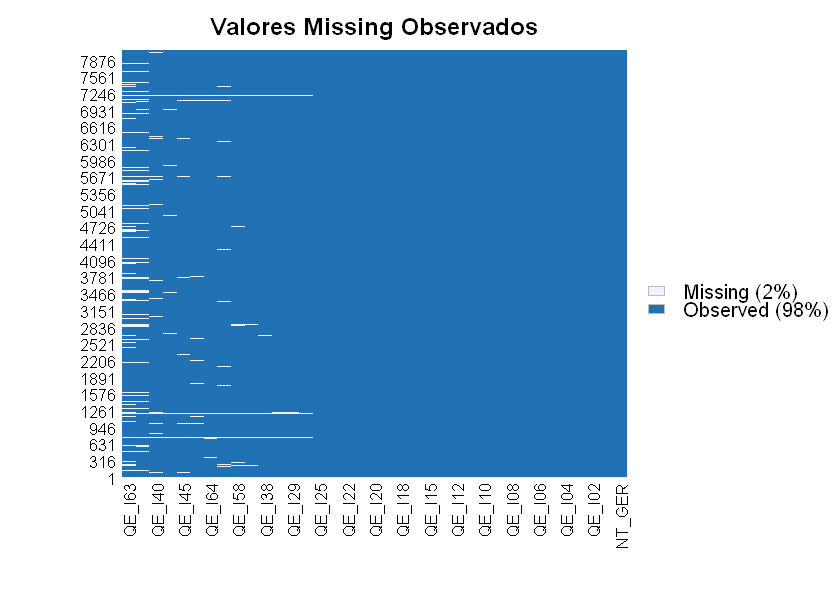

In [281]:
missmap(df, main="Valores Missing Observados")

In [20]:
sum(df$QE_I02 == "")

[1] 49

In [21]:
df = subset(df, QE_I02 != "")

In [22]:
sum(df$QE_I08 == "")

[1] 0

# primeiro modelo:
* Notas Gerais = 45 NT_GER
* Sexo = 12 TP_SEXO
* Raça ou Cor = 71 QE_I02
* Renda total da família = 77 QE_I08

In [38]:
df %>% 
    select(NT_GER, TP_SEXO, QE_I02, QE_I08) %>% 
    setNames(c("nota", "genero", "cor", "renda"))

,nota,genero,cor,renda
161,24.9,F,A,C
162,25.6,M,A,D
163,48.7,M,A,C
164,35.7,F,A,B
165,33.9,M,A,B
166,23.5,M,A,C
167,32.2,F,A,B
168,20.9,F,A,C
169,48.9,M,A,D
170,39.4,F,D,C


In [25]:
head(df)

,NT_GER,TP_SEXO,QE_I02,QE_I01,QE_I04,QE_I05,QE_I06,QE_I07,QE_I08,QE_I09,...,QE_I41,QE_I45,QE_I57,QE_I58,QE_I59,QE_I61,QE_I62,QE_I63,QE_I64,QE_I68
161,24.9,F,A,A,D,D,C,C,C,F,...,6,6,6,6,6,6,6,6,6,6
162,25.6,M,A,A,D,B,A,C,D,E,...,6,6,6,6,6,6,6,6,6,6
163,48.7,M,A,A,D,D,C,C,C,C,...,6,6,6,6,6,6,6,6,6,6
164,35.7,F,A,B,B,C,C,D,B,E,...,6,6,6,6,6,6,6,6,6,6
165,33.9,M,A,B,B,D,C,B,B,E,...,6,6,6,6,6,6,6,6,6,6
166,23.5,M,A,A,B,B,B,C,C,E,...,6,6,6,6,6,6,6,6,6,6


In [211]:
sum(df_1$renda == "")

[1] 0

In [212]:
sum(df_1$cor == "")

[1] 0

In [272]:
df_1 = dummy_cols(df_1, remove_first_dummy = TRUE)

In [273]:
head(df_1)

nota,genero,cor,renda,genero_M,cor_B,cor_C,cor_D,cor_E,cor_F,...,renda_C,renda_D,renda_E,renda_F,renda_G,cor_parda,cor_preta,cor_amarela,cor_não declarado,cor_indigina
24.9,F,branca,C,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
25.6,M,branca,D,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
48.7,M,branca,C,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
35.7,F,branca,B,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33.9,M,branca,B,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23.5,M,branca,C,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [219]:
table(df_1$cor)



   A    B    C    D    E    F 
4893  618  186 2129   19  177 

In [232]:
df_1$cor = mapvalues(df_1$cor, from=c("A","B","C","D","E","F"), to=c("branca","preta","amarela","parda","indigina","não declarado"))

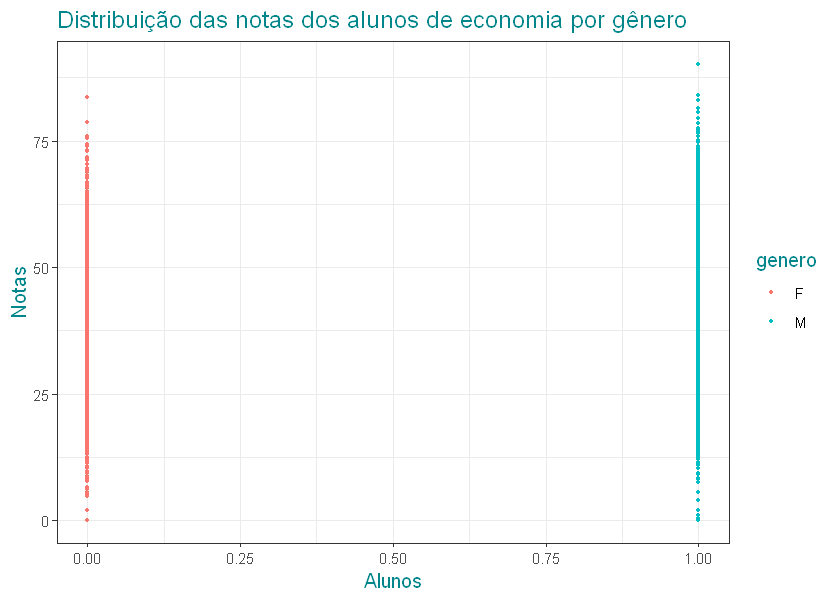

In [267]:
options(repr.plot.width = 7, repr.plot.height = 5)
ggplot(data=df_1, aes(y=nota, x=genero_M))+
    geom_point(aes(color=genero), size=0.8)+
    ggtitle("Distribuição das notas dos alunos de economia por gênero")+
    labs(x="Alunos", y="Notas")+
    theme_bw()+
    theme(title=element_text(size=12,color="turquoise4"))

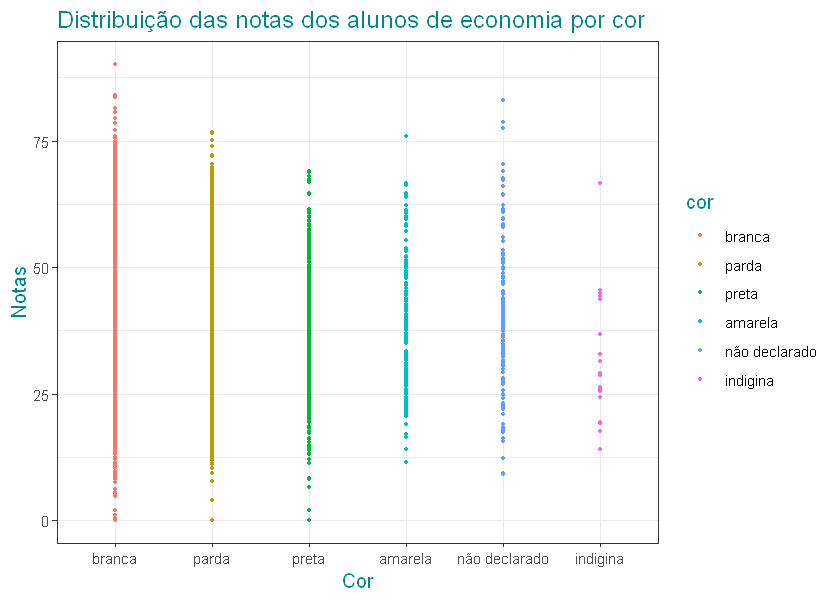

In [265]:
df_1$cor = factor(df_1$cor, levels=names(sort(table(df_1$cor), decreasing=TRUE)))
ggplot(data=df_1, aes(y=nota, x=cor))+
    geom_point(aes(color=cor), size=0.8)+
    ggtitle("Distribuição das notas dos alunos de economia por cor")+
    labs(x="Cor", y="Notas")+
    theme_bw()+
    theme(title=element_text(size=12,color="turquoise4"))

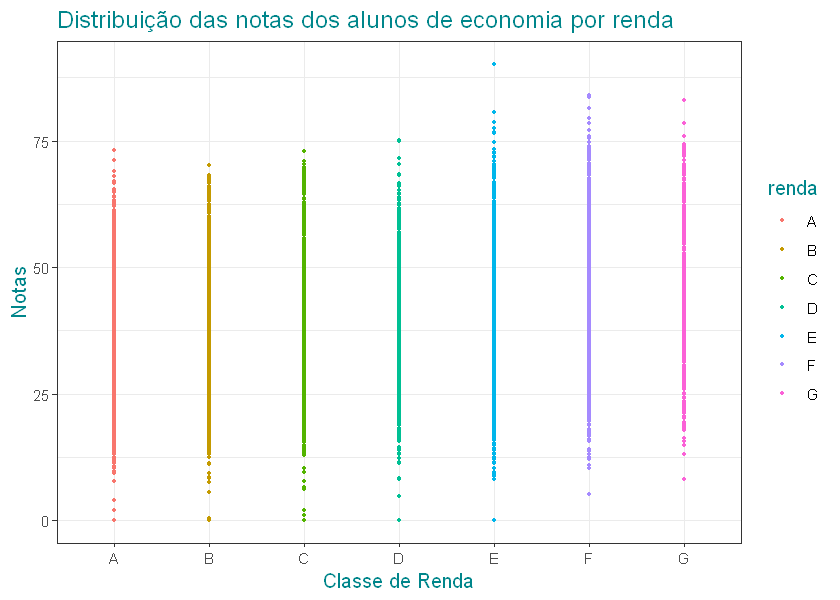

In [266]:
ggplot(data=df_1, aes(y=nota, x=renda))+
    geom_point(aes(color=renda), size=0.8)+
    ggtitle("Distribuição das notas dos alunos de economia por renda")+
    labs(x="Classe de Renda", y="Notas")+
    theme_bw()+
    theme(title=element_text(size=12,color="turquoise4"))

In [269]:
str(df_1)

'data.frame':	8022 obs. of  16 variables:
 $ nota    : num  24.9 25.6 48.7 35.7 33.9 23.5 32.2 20.9 48.9 39.4 ...
 $ genero  : chr  "F" "M" "M" "F" ...
 $ cor     : Factor w/ 6 levels "branca","parda",..: 1 1 1 1 1 1 1 1 1 2 ...
 $ renda   : chr  "C" "D" "C" "B" ...
 $ genero_M: int  0 1 1 0 1 1 0 0 1 0 ...
 $ cor_B   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ cor_C   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ cor_D   : int  0 0 0 0 0 0 0 0 0 1 ...
 $ cor_E   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ cor_F   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ renda_B : int  0 0 0 1 1 0 1 0 0 0 ...
 $ renda_C : int  1 0 1 0 0 1 0 1 0 1 ...
 $ renda_D : int  0 1 0 0 0 0 0 0 1 0 ...
 $ renda_E : int  0 0 0 0 0 0 0 0 0 0 ...
 $ renda_F : int  0 0 0 0 0 0 0 0 0 0 ...
 $ renda_G : int  0 0 0 0 0 0 0 0 0 0 ...
